# P1: Test a Perceptual Phenomenon


In this Project we will analyze data from a Stroop task. What is a Stroop task, you ask? Here's a nice description from the project instructions:

> In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

Our dataset consists of the results from several participants who performed this task. We have for each participant the time in seconds that they took to perform the task in the congruent conditions and the incongruent conditions.

Let's get started with answering the investigation questions!


## 1. What is our independent variable? What is our dependent variable?
Our independent variable is the variable we manipulate during the experiment. In this case, it is the Congruent/Incongruent condition. The dependent variable is the variable we are measuring. In this investigation, it is the number of seconds that each participant takes to read the list of words.

## 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
We can formulate the following null hypothesis:

> The mean difference between the Congruent and Incongruent task completion time in the general population is zero. 
> $$ H_0 :~\mu_C - \mu_I = 0 $$


As alternative hypothesis, we can formulate:

> The mean difference between the Congruent and Incongruent task completion time in the general population is not zero.
> $$ H_a :~\mu_C - \mu_I \neq 0 $$

The statistical test we should use is a two tailed paired t-test.  We are interested in knowing if there is a significant difference in reading speed by the population between the different task conditions. But since there are people who read faster than others we should use the paired t-test to correct for the individual ability of each participant in performing the task. We chose a two-tailed test, because the alternative hypothesis does not make any assumptions of the direction of the effect. We cannot use a Z-test because we do not know anything about the population parameters


## 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

We will use some Python code to answer the remaining questions.

In [2]:
# Importing the needed libraries
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib

%precision 3
# Reading the data file
stroopdata = pd.read_csv(r"stroopdata.csv")

In [3]:
stroopdata.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

In [4]:
# Using parameter ddof=0, means I am taking the standard deviation of the sample (this dataset)
# and not estimating the standard deviation of the population based on the sample.
stroopdata.std(ddof = 0)

Congruent      3.484416
Incongruent    4.696055
dtype: float64

The median and standard deviation for the congruent experiment is {{stroopdata.median()['Congruent']}} and {{stroopdata.std(ddof=0)['Congruent']}} respectively. For the incongruent experiment the median is {{stroopdata.median()['Incongruent']}} and the standard deviation is {{stroopdata.std(ddof=0)['Incongruent']}}. 

## 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
First, let's start by making a boxplot (see below). We can see that the results for the Incongruent conditions have generally higher values than the congruent conditions. There are some individuals that under congruent conditions took longer time than the median of the incongruent conditions. There are two outliers in the incongruent conditions experiment.

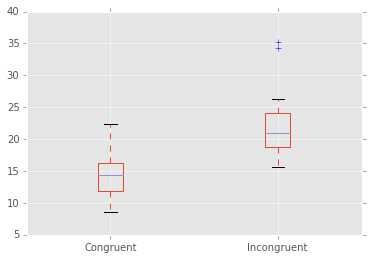

In [10]:
%matplotlib inline
matplotlib.style.use('ggplot');
stroopdata.boxplot();

Another way of visualizing the data is by creating a histogram (see below). On the histogram we can see again that the median time for the congruent conditions is lower than the incongruent conditions. Both distributions seem to have a positive skew. However, the number of individuals is relatively low, which makes the histogram not have a nicely defined shape.

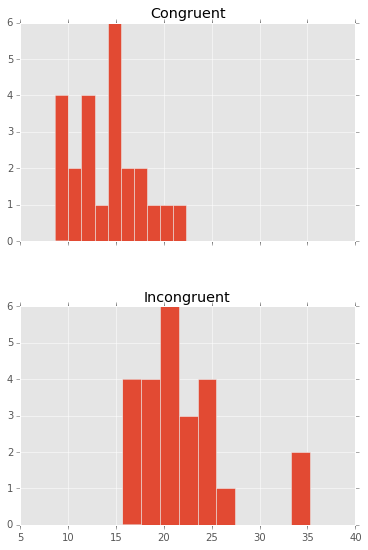

In [6]:
stroopdata.hist(sharex = True, layout=(2, 1), figsize=(6,9));

## 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

We will use 95% as our confidence level. This means, that for a two-tailed t-test, the critical t value is:

In [7]:
df = stroopdata.count()[0]-1 #degrees of freedom
t_critical = stats.t.ppf(0.975, df) #Two tailed critical t
print("df =", df)
print("t_critical = ", t_critical)

df = 23
t_critical =  2.06865761042


A paired-samples t-test was performed to compare the time to complete the reading task in the congruent and incongruent conditions.

In [8]:
t_statistic, p_value = stats.ttest_rel(stroopdata["Congruent"], 
                                       stroopdata["Incongruent"])
print("T statistic = ", t_statistic)
print("p_value = ", p_value)

T statistic =  -8.02070694411
p_value =  4.10300058571e-08


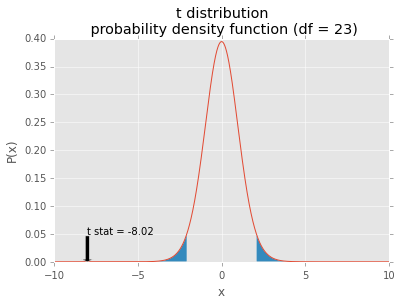

In [9]:
# Plot distribution
rng = np.arange(-10, 10, 0.001)
t_dist = stats.t(df).pdf
plt.xlabel("x")
plt.ylabel("P(x)")

plt.plot(rng, t_dist(rng))
# Plot critical region
plt.fill_between(rng, t_dist(rng), 
                where=np.logical_or(rng < -t_critical,rng > t_critical))
# Plot t statistic of t-test
plt.title("t distribution \n probability density function (df = 23)")
plt.annotate("t stat = {:.2f}".format(t_statistic), 
             xy=(t_statistic, 0), 
             xytext=(t_statistic, 0.05),
             arrowprops=dict(facecolor="black"))

plt.show()

There is a significant difference in the results for the congruent and incongruent tasks (t(23)={{t_statistic}}, p < 0.05). The t-statistic falls inside the critical region. We reject the null hypothesis. This suggests, that under the incongruent conditions, the participants take significantly longer time to read the word list, than in the Congruent conditions.

## 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!
My first intuition, is that on the incongruent conditions, the human brain is processing two different kinds of inputs: the words and the color of the words. And these have contradicting information. Therefore, we take longer to read the word because we need to decide which piece of information is correct.


MacLeod (1991) presents an extensive review about several theories that aim to explain the stroop effect. According to the review, the two predominant ones were _relative speed of processing_ and _automaticity_. 

The _relative speed of processing_  explains the stroop effect 

> with the fact that words are read faster than colors are named. This speed difference is seens as particulary critical when two potensial responses compete to be the response actually produced. The time cost of this competition is "interference".

The _automaticity_ theory says that:

> processing of one dimension requires more attention than does the processing of the other dimension. Thus, naming the ink color draws more heavily on attentional resources than does reading the irrelevant word.[...] Words are read automatically; colors require considerably more attention to be named.

However, MacLeod rejects these explanations because they cannot explain a list of major empirical results given in his review.

According to Google Scholar, this review has been cited 3842 times, which shows that there is still much research being made around this topic.

A variation of the stroop effect, can be using shapes, with words overlayed. In a congruent condition, the word is the shape name, and in the incongruent condition, the word will be a different shape name (Science Buddies Staff, 2014).


## References

McDonald, J. (2015). _Paired t–test - Handbook of Biological Statistics._ [online] Biostathandbook.com. Available at: http://www.biostathandbook.com/pairedttest.html [Accessed 21 Aug. 2015].

Docs.scipy.org, (2015). scipy.stats.ttest_rel — SciPy v0.14.0 Reference Guide. [online] Available at: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html [Accessed 30 Aug. 2015].

Statistics-help-for-students.com, (2015). _How do I report paired samples T-test data in APA style?._ [online] Available at: http://statistics-help-for-students.com/How_do_I_report_paired_samples_T_test_data_in_APA_style.htm [Accessed 21 Aug. 2015].

Udacity.com, (2015). _Statistics - Class Notes._ [online] Available at: https://www.udacity.com/course/viewer#!/c-ud134-nd [Accessed 21 Aug. 2015].

MacLeod, C. (1991). _Half a century of research on the Stroop effect: An integrative review_. Psychological Bulletin, 109(2), pp.163-203.

Science Buddies Staff (2014). _Warped Words and the Stroop Effect._ [online] Sciencebuddies.org. Available at: http://www.sciencebuddies.org/science-fair-projects/project_ideas/HumBeh_p029.shtml [Accessed 19 Sep. 2015].